# Analisis inicial dataset 

In [8]:
import pandas as pd
import numpy          as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import itertools


In [9]:

data = pd.read_csv("../../data/raw/data.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../../data/raw/data.csv'

In [ ]:
data

,id,label,statement,subject,speaker,speaker_job,state_info,party_affiliation
0,81f884c64a7,1,China is in the South China Sea and (building)...,"china,foreign-policy,military",donald-trump,President-Elect,New York,republican
1,30c2723a188,0,With the resources it takes to execute just ov...,health-care,chris-dodd,U.S. senator,Connecticut,democrat
2,6936b216e5d,0,The (Wisconsin) governor has proposed tax give...,"corporations,pundits,taxes,abc-news-week",donna-brazile,Political commentator,"Washington, D.C.",democrat
3,b5cd9195738,1,Says her representation of an ex-boyfriend who...,"candidates-biography,children,ethics,families,...",rebecca-bradley,NaN,NaN,none
4,84f8dac7737,0,At protests in Wisconsin against proposed coll...,"health-care,labor,state-budget",republican-party-wisconsin,NaN,Wisconsin,republican
...,...,...,...,...,...,...,...,...
8945,44edff2b865,1,If Rhode Island does a hybrid [retirement] pla...,"pensions,public-service,retirement,workers",lincoln-chafee,NaN,Rhode Island,democrat
8946,4a63b5f9c16,1,The new health care law will force seniors int...,"medicare,message-machine,retirement",dan-coats,NaN,Indiana,republican
8947,7c57fa8e81c,0,The health insurance plan that (members of Con...,health-care,steve-southerland,"U.S. Representative, Florida District 2",Florida,republican
8948,2375e3cf4b7,1,No one in American history has moved from a Ju...,"elections,history",newt-gingrich,"Co-host on CNN's ""Crossfire""",Georgia,republican


In [ ]:
data.shape

(8950, 8)

## Analisis de columnas

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 8950 non-null   object
 1   label              8950 non-null   int64 
 2   statement          8950 non-null   object
 3   subject            8950 non-null   object
 4   speaker            8950 non-null   object
 5   speaker_job        6468 non-null   object
 6   state_info         7020 non-null   object
 7   party_affiliation  8950 non-null   object
dtypes: int64(1), object(7)
memory usage: 559.5+ KB


In [ ]:
# Identificación de valores nulos
print("Valores nulos por columna:")
print(data.isnull().sum(), "\n")

Valores nulos por columna:
id                      0
label                   0
statement               0
subject                 0
speaker                 0
speaker_job          2482
state_info           1930
party_affiliation       0
dtype: int64 



In [ ]:
# Mostrar los valores únicos de cada columna
print("Valores únicos por columna:")
for column in data.columns:
    print(f"Columna '{column}':")
    valores_unicos = data[column].unique()
    print(valores_unicos)
    print(f"Cantidad de valores únicos: {len(valores_unicos)}")
    print()


Valores únicos por columna:
Columna 'id':
['81f884c64a7' '30c2723a188' '6936b216e5d' ... '7c57fa8e81c' '2375e3cf4b7'
 '5ae9b14e6e5']
Cantidad de valores únicos: 8950

Columna 'label':
[1 0]
Cantidad de valores únicos: 2

Columna 'statement':
['China is in the South China Sea and (building)a military fortress the likes of which perhaps the world has not seen.'
 'With the resources it takes to execute just over three months of the Iraq war, we could fully fund the expansion of health care for needy children that Bush vetoed.'
 'The (Wisconsin) governor has proposed tax giveaways to corporations.'
 ...
 'The health insurance plan that (members of Congress) have is no different than any other federal employees in the United States government.'
 'No one in American history has moved from a June 16 announcement to a May 26 winning of a majority. Trumps achievement is remarkable.'
 'Says the Army is spending $7 million to sponsor a NASCAR team.']
Cantidad de valores únicos: 8939

Columna 'sub

In [ ]:
# Rellenar los valores nulos con "non-define"
data['speaker_job'] = data['speaker_job'].fillna('non-define')
data['state_info'] = data['state_info'].fillna('non-define')

In [ ]:
# Identificación de valores nulos
print("Valores nulos por columna:")
print(data.isnull().sum(), "\n")

Valores nulos por columna:
id                   0
label                0
statement            0
subject              0
speaker              0
speaker_job          0
state_info           0
party_affiliation    0
dtype: int64 



In [ ]:
#  Comprobación de duplicados
print("Número de filas duplicadas:")
print(data.duplicated().sum(), "\n")

Número de filas duplicadas:
0 



### label

In [ ]:
label_counts = data['label'].value_counts()
print(label_counts)

label
1    5795
0    3155
Name: count, dtype: int64


Fake "1" : 5795
Not Fake "0": 3155
Fake: 64.7486033519553%


C:\Users\anaeg\AppData\Local\Temp\ipykernel_6264\2808548115.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['Not Fake', 'Fake'])


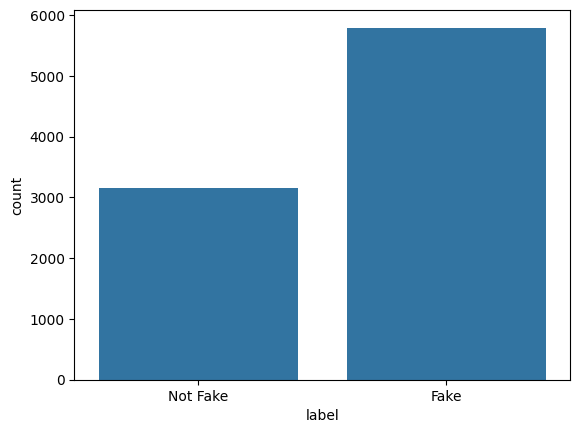

In [ ]:


# Contar las ocurrencias de 0 y 1 en la columna 'label'
count = data['label'].value_counts()

print('Fake "1" :', count[1])
print('Not Fake "0":', count[0])

# Calcular el porcentaje de 'Fake' (1)
print(f'Fake: {count[1] / (count[0] + count[1]) * 100}%')

# Graficar las ocurrencias de 1's y 0's
g = sns.countplot(x=data['label'])
g.set_xticklabels(['Not Fake', 'Fake'])
plt.show()


### subject

In [ ]:
pd.set_option('display.max_rows', None)
subject_counts = data['subject'].value_counts()
print(subject_counts)

subject
health-care                                                                                                                                                                                                    341
taxes                                                                                                                                                                                                          244
elections                                                                                                                                                                                                      225
immigration                                                                                                                                                                                                    224
education                                                                                                                                           

Viene escritos todos los temas que se hablan en la statemen, por ejemplo: federal-budget,medicare (unico subject) 
Creo que lo mejor es sacar los token se todas las estatement y desde ahi vercomo podemos preprocesar


### speaker

In [ ]:
speaker_counts = data['speaker'].value_counts()
print(speaker_counts)

speaker
barack-obama                                          435
donald-trump                                          247
hillary-clinton                                       204
mitt-romney                                           142
john-mccain                                           139
chain-email                                           128
scott-walker                                          123
rick-perry                                            117
rick-scott                                            105
marco-rubio                                            99
ted-cruz                                               82
bernie-s                                               75
facebook-posts                                         75
chris-christie                                         74
charlie-crist                                          62
newt-gingrich                                          62
jeb-bush                                               60
blog-p

In [ ]:
count = data.speaker.value_counts().to_frame(name='count')
percentage = (data[data.label==1].speaker.value_counts() / data.speaker.value_counts()).to_frame(name='percentage')

speaker_info = pd.concat([count,percentage], axis=1)

print('Speakers con mas nuemero de statements y porcentaje de cuales de ellas han sido falsas')
print(speaker_info.sort_values(by='count',ascending=False).head(10))
print()
speaker_by_percentage = speaker_info.sort_values(by='percentage',ascending=False)
print('Speaker ordenados por mayor porcentaje de fake statements')
print(speaker_by_percentage[speaker_by_percentage['count'] > 10])
print()

Speakers con mas nuemero de statements y porcentaje de cuales de ellas han sido falsas
                 count  percentage
speaker                           
barack-obama       435    0.535632
donald-trump       247    0.834008
hillary-clinton    204    0.480392
mitt-romney        142    0.718310
john-mccain        139    0.589928
chain-email        128    0.968750
scott-walker       123    0.650407
rick-perry         117    0.717949
rick-scott         105    0.647619
marco-rubio         99    0.676768

Speaker ordenados por mayor porcentaje de fake statements
                                          count  percentage
speaker                                                    
viral-image                                  18    1.000000
americans-prosperity                         15    1.000000
chain-email                                 128    0.968750
rush-limbaugh                                25    0.960000
national-republican-senatorial-committee     24    0.958333
...           

### speaker_job

In [ ]:
speaker_job_counts = data['speaker_job'].value_counts()
print(speaker_job_counts)

speaker_job
non-define                                                                                              2482
President                                                                                                438
U.S. Senator                                                                                             391
Governor                                                                                                 335
President-Elect                                                                                          247
U.S. senator                                                                                             236
Presidential candidate                                                                                   215
U.S. Representative                                                                                      149
Former governor                                                                                          142
Senator

In [ ]:
data.speaker_job = data.speaker_job.apply(lambda x: x.lower() if type(x)==str else x)
count = data.speaker_job.value_counts().to_frame(name='count')
percentage = (data[data.label==1].speaker_job.value_counts() / data.speaker_job.value_counts()).to_frame(name='percentage')

speaker_job_info = pd.concat([count,percentage], axis=1)
print('Speakers_jobs con mas nuemero de statements y porcentaje de cuales de ellas han sido falsas')
print(speaker_job_info.sort_values(by='count',ascending=False).head(10))
print()
speaker_job_by_percentage = speaker_job_info.sort_values(by='percentage',ascending=False)

print('Speaker_jobs ordenados por mayor porcentaje de fake statements')
print(speaker_job_by_percentage[speaker_job_by_percentage['count'] > 10])
print()

Speakers_jobs con mas nuemero de statements y porcentaje de cuales de ellas han sido falsas
                        count  percentage
speaker_job                              
u.s. senator              627    0.548644
president                 438    0.536530
governor                  368    0.663043
president-elect           247    0.834008
u.s. representative       230    0.626087
presidential candidate    216    0.495370
state senator             183    0.568306
state representative      153    0.614379
former governor           143    0.720280
senator                   129    0.689922

Speaker_jobs ordenados por mayor porcentaje de fake statements
                            count  percentage
speaker_job                                  
radio host                     26    0.961538
advocacy group                 14    0.928571
maryland governor              11    0.909091
milwaukee county sheriff       11    0.909091
member of the u.s. house       15    0.866667
...               

### state_info

In [ ]:
state_info_counts = data['state_info'].value_counts()
print(state_info_counts)

state_info
non-define                                           1930
Texas                                                 879
Florida                                               853
Wisconsin                                             648
New York                                              579
Illinois                                              487
Ohio                                                  408
Georgia                                               381
Virginia                                              368
Rhode Island                                          317
Oregon                                                220
New Jersey                                            209
Massachusetts                                         167
Arizona                                               160
California                                            121
Washington, D.C.                                       89
Vermont                                                80
New

Hay cosas mal escritas: 
1) "Rhode Island" y "Rhode island"
2) "Virgina" a "Virginia"
3) "Tennesse" a "Tennessee"
4) Variaciones de Washingtn DC

La gran mayoria son estados de estados unidos.
Hay un valor que es estados unidos de por si, que no epsecifican estados.
Foreigh =  Russia (1), Qatar (1) y China(1)

Valores raros:
Virginia director, Coalition to Stop Gun Violence: 1


In [ ]:
corrections = {
    'Virgina': 'Virginia',
    'Tennesse': 'Tennessee',
    'ohio': 'Ohio',
    'Rhode island': 'Rhode Island',
    'Washington D.C.': 'Washington, D.C.',
    'District of Columbia': 'Washington, D.C.',
    'Washington state': 'Washington',
    'the United States': 'United States',
}

In [ ]:
data['state_info'] = data['state_info'].replace(corrections)
state_info_counts = data['state_info'].value_counts()
print(state_info_counts)


state_info
non-define           1930
Texas                 879
Florida               853
Wisconsin             648
New York              579
Illinois              487
Ohio                  410
Georgia               381
Virginia              370
Rhode Island          318
Oregon                220
New Jersey            209
Massachusetts         167
Arizona               160
California            121
Washington, D.C.      101
Vermont                80
New Hampshire          79
Pennsylvania           79
Arkansas               77
Kentucky               72
Delaware               61
Tennessee              61
Maryland               60
Minnesota              54
North Carolina         51
Alaska                 50
Nevada                 40
Indiana                38
Missouri               32
South Carolina         25
Louisiana              25
New Mexico             24
Colorado               22
Connecticut            21
Michigan               21
Utah                   19
Kansas                 13
I

In [ ]:
virginia_director = data[data['state_info'].str.contains("Virginia director")]
virginia_director


,id,label,statement,subject,speaker,speaker_job,state_info,party_affiliation
6013,e1b888de79e,1,In states that have private-sale background ch...,"crime,guns,states,women",lori-haas,Virginia,"Virginia director, Coalition to Stop Gun Violence",activist


Estan invertidos los valores de speaker_job y state_info

In [ ]:
# Filtrar la fila con el ID específico
row = data[data['id'] == 'e1b888de79e']

# Intercambiar los valores de 'speaker_job' y 'state_info' para esa fila
data.loc[data['id'] == 'e1b888de79e', ['speaker_job', 'state_info']] = row[['state_info', 'speaker_job']].values


In [ ]:
virginia_director = data[data['speaker_job'].str.contains("Virginia director")]
virginia_director

,id,label,statement,subject,speaker,speaker_job,state_info,party_affiliation
4198,21b7d69a2c7,0,Twenty-four percent of doctors in Virginia cur...,"health-care,medicaid",dave-schwartz,Virginia director of Americans for Prosperity,Virginia,republican
6013,e1b888de79e,1,In states that have private-sale background ch...,"crime,guns,states,women",lori-haas,"Virginia director, Coalition to Stop Gun Violence",Virginia,activist


CAmbiado con exito

In [12]:
count = data.state_info.value_counts().to_frame(name='count')
percentage = (data[data.label==1].state_info.value_counts() / data.state_info.value_counts()).to_frame(name='percentage')

state_info = pd.concat([count,percentage], axis=1)

print('State con mas nuemero de statements y porcentaje de cuales de ellas han sido falsas')
print(state_info.sort_values(by='count',ascending=False).head(10))
print()
state_by_percentage = state_info.sort_values(by='percentage',ascending=False)
print('State ordenados por mayor porcentaje de fake statements')
print(state_by_percentage[state_by_percentage['count'] > 10].head(20))
print()

State con mas nuemero de statements y porcentaje de cuales de ellas han sido falsas
              count  percentage
state_info                     
Texas           879    0.654152
Florida         853    0.617819
Wisconsin       648    0.703704
New York        579    0.673575
Illinois        487    0.554415
Ohio            408    0.517157
Georgia         381    0.608924
Virginia        368    0.619565
Rhode Island    317    0.618297
Oregon          220    0.595455

State ordenados por mayor porcentaje de fake statements
                  count  percentage
state_info                         
Iowa                 13    0.846154
Indiana              38    0.815789
Pennsylvania         79    0.784810
Minnesota            54    0.777778
Alaska               50    0.760000
Utah                 19    0.736842
Colorado             22    0.727273
Wisconsin           648    0.703704
Massachusetts       167    0.700599
Kansas               13    0.692308
South Carolina       25    0.680000
Arkansa

### party_affiliation

In [ ]:
party_counts = data['party_affiliation'].value_counts()
print(party_counts)

party_affiliation
republican                      3947
democrat                        2898
none                            1531
organization                     197
independent                      130
newsmaker                         41
journalist                        37
libertarian                       34
columnist                         32
activist                          30
talk-show-host                    23
state-official                    14
tea-party-member                   8
business-leader                    8
labor-leader                       7
green                              3
constitution-party                 2
education-official                 2
Moderate                           1
county-commissioner                1
liberal-party-canada               1
ocean-state-tea-party-action       1
government-body                    1
democratic-farmer-labor            1
Name: count, dtype: int64


Republican - uno de los dos partidos principales en los EE. UU.  Los republicanos generalmente favorecen políticas que promueven el libre mercado, el control del gasto público y una postura más rígida en temas de seguridad y justicia social.
Democrat  - otro de los principales partidos políticos en los EE. UU. Los demócratas apoyan el gobierno activo en la regulación del mercado, la implementación de políticas sociales y la protección de los derechos civiles.
None - Este perfil hace referencia a personas o entidades que no se identifican con un partido político específico. Pueden ser apolíticos o simplemente no alinearse con ninguna ideología predominante.
Organization - Se refiere a grupos u organizaciones que no son partidos políticos, pero que tienen una influencia significativa en la política, como ONGs.
Independent - Los independientes son personas que no están afiliadas a ningún partido político. 
Newsmaker -  Los newsmakers son influyentes en la política debido a su capacidad para generar atención mediática y moldear la opinión pública.
Journalist - Este perfil se refiere a los periodistas, quienes informan sobre eventos y desarrollos en el ámbito político, social y económico.
Libertarian - Los libertarios abogan por una política de mínimo gobierno y máxima libertad individual, promoviendo el libre mercado y la protección de los derechos personales. Los libertarios suelen alinearse con el Partido Libertario o adoptar una postura independiente. - Independent
Columnist - Los columnistas son escritores que expresan opiniones y análisis sobre temas políticos y sociales. - Independent
Activist - Pueden estar afiliados a partidos políticos, pero a menudo son más conocidos por su militancia. - Independent
Talk-show Host - Los presentadores de talk shows - Media
State Official - Los funcionarios estatales son individuos que ocupan cargos públicos en los gobiernos estatales. 
Tea Party Member - Los miembros del Tea Party son individuos que apoyan este movimiento político de ideología conservadora dentro del Partido Republicano. - Republican
Business Leader - e refiere a personas influyentes en el mundo de los negocios, como ejecutivos de grandes empresas. - Organization
Labor Leader - Los líderes sindicales suelen estar alineados con el Partido Demócrata en los EE. UU., y su enfoque está centrado en la justicia social y los derechos laborales. - Democrata
Green - El Partido Verde aboga por políticas ambientales, la lucha contra el cambio climático y la justicia social. Independiente
Constitution Party -  El Constitution Party es un partido político conservador en EE. UU. que aboga por una estricta interpretación de la Constitución y promueve el federalismo.
Education Official - s funcionarios de educación son responsables de implementar políticas educativas y su ideología influye en cómo se gestionan los sistemas educativos.
Moderate  - Un moderado es una persona que no se identifica con una ideología política extrema, sino que busca un enfoque equilibrado entre los diferentes espectros políticos. 
County Commissioner - Un comisionado de condado es un funcionario local que administra los asuntos del gobierno del condado. - State Official
Liberal Party Canada - El Partido Liberal de Canadá es un partido político progresista que promueve políticas sociales, económicas y ambientales. - Liberirial 
Ocean State Tea Party Action -  Se refiere a un grupo de activismo político en Rhode Island relacionado con el movimiento Tea Party. - Tea PArty - Republican
Government Body - Hace referencia a un órgano o institución del gobierno que no se alinea con un partido político específico.
Democratic-Farmer-Labor - Este es un partido político que fue precursor del Partido Demócrata moderno - Democrata

Vamos a unificar algunos tipos de esta columan en una nueva columna

In [ ]:
corrections = {
    'democratic-farmer-labor': 'democrat',
    'ocean-state-tea-party-action': 'republican',
    'liberal-party-canada': 'libertarian',
    'tea-party-member': 'republican',
    'labor-leader': 'democrat',
    'green': 'independent',
    'county-commissioner': 'state-official',
    'education-official': 'state-official',
    'business-leader': 'organization',
    'government-body': 'state-official',
    'Moderate': 'independent',
    'constitution-party': 'independent'
}

In [ ]:
data['party_affiliation_uni'] = data['party_affiliation'].replace(corrections)


In [ ]:
party_counts = data['party_affiliation_uni'].value_counts()
print(party_counts)

party_affiliation_uni
republican        3956
democrat          2906
none              1531
organization       205
independent        136
newsmaker           41
journalist          37
libertarian         35
columnist           32
activist            30
talk-show-host      23
state-official      18
Name: count, dtype: int64


In [ ]:
category_mapping = {
    'republican': 'political-affiliation',
    'democrat': 'political-affiliation',
    'independent': 'political-affiliation',
    'libertarian': 'political-affiliation',
    'none': 'other-political-groups',
    'organization': 'other-political-groups',
    'activist': 'other-political-groups',
    'newsmaker': 'media-and-communication',
    'journalist': 'media-and-communication',
    'columnist': 'media-and-communication',
    'talk-show-host': 'media-and-communication',
    'state-official': 'government-officials-and-authorities'
}

In [ ]:
data['party_affiliation_category_map'] = data['party_affiliation_uni'].replace(category_mapping)
party_counts = data['party_affiliation_category_map'].value_counts()
print(party_counts)

party_affiliation_category_map
political-affiliation                   7033
other-political-groups                  1766
media-and-communication                  133
government-officials-and-authorities      18
Name: count, dtype: int64


In [13]:
count = data.party_affiliation.value_counts().to_frame(name='count')
percentage = (data[data.label==1].party_affiliation.value_counts() / data.party_affiliation.value_counts()).to_frame(name='percentage')

party_affiliation_info = pd.concat([count,percentage], axis=1)

print('State con mas nuemero de statements y porcentaje de cuales de ellas han sido falsas')
print(party_affiliation_info.sort_values(by='count',ascending=False).head(10))
print()
party_affiliation_by_percentage = party_affiliation_info.sort_values(by='percentage',ascending=False)
print('State ordenados por mayor porcentaje de fake statements')
print(party_affiliation_by_percentage[party_affiliation_by_percentage['count'] > 10].head(20))
print()

State con mas nuemero de statements y porcentaje de cuales de ellas han sido falsas
                   count  percentage
party_affiliation                   
republican          3947    0.695212
democrat            2898    0.562112
none                1531    0.693664
organization         197    0.812183
independent          130    0.446154
newsmaker             41    0.536585
journalist            37    0.513514
libertarian           34    0.617647
columnist             32    0.593750
activist              30    0.566667

State ordenados por mayor porcentaje de fake statements
                   count  percentage
party_affiliation                   
organization         197    0.812183
talk-show-host        23    0.739130
republican          3947    0.695212
none                1531    0.693664
libertarian           34    0.617647
columnist             32    0.593750
activist              30    0.566667
democrat            2898    0.562112
newsmaker             41    0.536585
journali

In [ ]:
data.to_csv('data_limpieza_v1.csv', index=False)


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 8950 non-null   object
 1   label              8950 non-null   int64 
 2   statement          8950 non-null   object
 3   subject            8950 non-null   object
 4   speaker            8950 non-null   object
 5   speaker_job        6468 non-null   object
 6   state_info         7020 non-null   object
 7   party_affiliation  8950 non-null   object
dtypes: int64(1), object(7)
memory usage: 559.5+ KB
